In [ ]:
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelBinarizer
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [ ]:
data, labels = make_classification(n_samples=2000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, n_classes=4)

In [ ]:
data

array([[ 1.15484068,  0.83926896],
       [-1.36062197,  1.52108321],
       [ 0.11559127, -2.00533992],
       ...,
       [-0.53401473, -1.31185441],
       [ 0.86217629, -1.09366087],
       [ 0.96317929,  0.91800983]])

In [ ]:
labels = labels.reshape(len(labels), 1)

In [ ]:
labels

array([[3],
       [2],
       [0],
       ...,
       [0],
       [2],
       [3]])

In [ ]:
df = pd.DataFrame(data, columns=["column 1", "column 2"])

In [ ]:
df['class'] = labels

In [ ]:
df

column 1  column 2  class
0     1.154841  0.839269      3
1    -1.360622  1.521083      2
2     0.115591 -2.005340      0
3    -2.792816  3.031839      2
4    -0.313178 -0.732938      0
...        ...       ...    ...
1995 -4.132807  4.558461      2
1996 -1.061544  1.222464      2
1997 -0.534015 -1.311854      0
1998  0.862176 -1.093661      2
1999  0.963179  0.918010      3

[2000 rows x 3 columns]

In [ ]:
px.scatter(df, x="column 1", y="column 2", color="class").show()

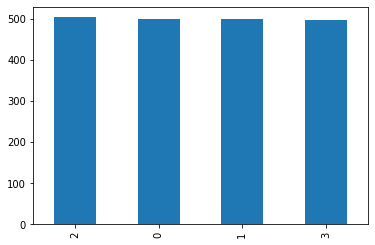

In [ ]:
df['class'].value_counts().plot(kind='bar')

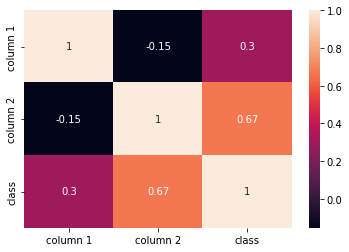

In [ ]:
sb.heatmap(df.corr(), annot=True)

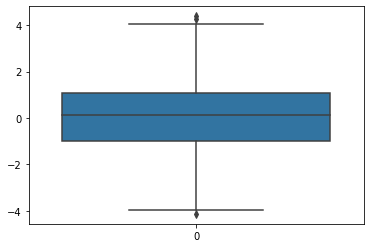

In [ ]:
sb.boxplot(data=df['column 1'])

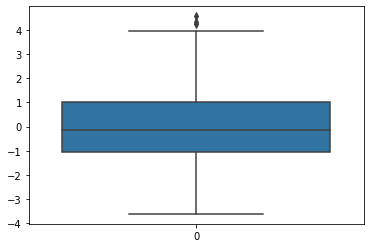

In [ ]:
sb.boxplot(data=df['column 2'])

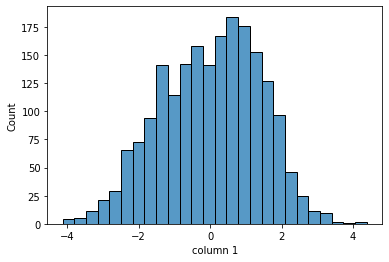

In [ ]:
sb.histplot(df['column 1'])

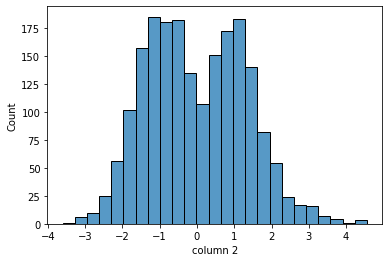

In [ ]:
sb.histplot(df['column 2'])

#### Labels

In [ ]:
labels = df.pop('class')

In [ ]:
labels = np.array(labels).reshape(labels.shape[0], 1)

In [ ]:
labels

array([[3],
       [2],
       [0],
       ...,
       [0],
       [2],
       [3]])

In [ ]:
labels.shape

(2000, 1)

#### Adding 1's to data for that bias weight theta_0

In [ ]:
df = np.array(df)

In [ ]:
df

array([[ 1.15484068,  0.83926896],
       [-1.36062197,  1.52108321],
       [ 0.11559127, -2.00533992],
       ...,
       [-0.53401473, -1.31185441],
       [ 0.86217629, -1.09366087],
       [ 0.96317929,  0.91800983]])

In [ ]:
df = np.hstack((np.ones((df.shape[0], 1)), df))

#### Splitting in train-test split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df, labels, test_size=0.3, shuffle=True, stratify=labels)

In [ ]:
x_train

array([[ 1.        ,  0.3747035 ,  1.43692631],
       [ 1.        , -0.87318464, -2.37735968],
       [ 1.        , -0.98016756,  1.2083702 ],
       ...,
       [ 1.        , -1.65094659, -1.1718477 ],
       [ 1.        ,  1.19785278,  0.97245968],
       [ 1.        ,  2.01819098, -0.22468399]])

In [ ]:
x_train.shape

(1400, 3)

#### Label Binarizer - Binarizing the labels

In [ ]:
y_train_label_bin = LabelBinarizer()

In [ ]:
y_train_bin_fit = y_train_label_bin.fit(y_train)

In [ ]:
y_train_bin = y_train_bin_fit.transform(y_train)

In [ ]:
y_train_bin[:, 0].shape

(1400,)

In [ ]:
y_train_bin[:, 0].reshape(y_train_bin.shape[0], 1).shape

(1400, 1)

#### Theta

In [ ]:
theta_initial = np.zeros((x_train.shape[1], 1))

In [ ]:
theta_initial

array([[0.],
       [0.],
       [0.]])

## Hypothesis function

#### h = 1/(1+exp(-(hypothesis of linear regression)))

#### = 1/(1+exp(-(X @ theta)))

In [ ]:
def hypothesis(X, theta):
    linear = X @ theta
    h = 1/(1 + np.exp(-(linear)))
    return h

## Binary Cross Entropy or Minimize log likelihood

#### -1/m * sum((y * log_e(h)) + ((1-y) * log(1-h)))

In [ ]:
def cost_function(h, labels):
     first_part = np.log(h).transpose() @ labels
     second_part = np.log(1-h).transpose() @ (1-labels)

     cf = -((first_part + second_part)/h.shape[0])
     return cf

## Gradient Descent

#### X(h-y) / m

In [ ]:
def gradient_descent(X, h, labels):
    grad = (X.transpose() @ (h-labels))/X.shape[0]
    return grad

In [ ]:
X = x_train.copy()
theta = theta_initial.copy()

In [ ]:
all_cost = {}
all_thetas = {}
all_h = {}
all_grad = {}
all_count = {}
for i in range(4):
    X = x_train.copy()
    theta = theta_initial.copy()
    labels = y_train_bin[:, i].reshape(y_train_bin.shape[0], 1)
    learning_rate = 0.01
    n_epochs = 10000
    grad = np.array([[1.0], [1.0], [1.0]])
    count = 0
    for _ in range(n_epochs):
    # while round(grad[0][0]) != 0 or round(grad[1][0]) != 0 or round(grad[2][0]) != 0: # Repeat until convergence i.e. gradient ~ 0
        # Calculate hypothesis function
        h = hypothesis(X, theta)
        if i in all_h:
            all_h[i].append(h)
        else:
            all_h[i] = [h]
        
        # Caluclate the cost function
        loss = cost_function(h, labels)
        if i in all_cost:
            all_cost[i].append(loss)
        else:
            all_cost[i] = [loss]

        # Calculate the gradien descent
        grad_descent = gradient_descent(X, h, labels)
        if i in all_grad:
            all_grad[i].append(grad_descent)
        else:
            all_grad[i] = [grad_descent]
        grad = grad_descent

        if loss < 0:
            # Update the theta
            theta = theta + (learning_rate * grad_descent)
            if i in all_thetas:
                all_thetas[i].append(theta)
            else:
                all_thetas[i] = [theta]
        elif loss > 0:
            # Update the theta
            theta = theta - (learning_rate * grad_descent)
            if i in all_thetas:
                all_thetas[i].append(theta)
            else:
                all_thetas[i] = [theta]
        

        count += 1

    


In [ ]:
count

5000

In [ ]:
all_grad[0][0][1][0]

0.25783062658222733

In [ ]:
all_cost

{0: [array([[0.69314718]]),
  array([[0.6742546]]),
  array([[0.65667837]]),
  array([[0.64031821]]),
  array([[0.62507923]]),
  array([[0.6108724]]),
  array([[0.59761485]]),
  array([[0.58522985]]),
  array([[0.57364672]]),
  array([[0.5628006]]),
  array([[0.5526321]]),
  array([[0.54308697]]),
  array([[0.53411573]]),
  array([[0.5256733]]),
  array([[0.5177186]]),
  array([[0.51021423]]),
  array([[0.50312612]]),
  array([[0.49642322]]),
  array([[0.49007725]]),
  array([[0.48406237]]),
  array([[0.47835501]]),
  array([[0.47293364]]),
  array([[0.46777853]]),
  array([[0.46287165]]),
  array([[0.45819644]]),
  array([[0.45373773]]),
  array([[0.44948155]]),
  array([[0.44541508]]),
  array([[0.44152649]]),
  array([[0.43780487]]),
  array([[0.43424018]]),
  array([[0.4308231]]),
  array([[0.42754504]]),
  array([[0.42439802]]),
  array([[0.42137465]]),
  array([[0.41846808]]),
  array([[0.41567191]]),
  array([[0.41298023]]),
  array([[0.41038749]]),
  array([[0.40788856]]),
  ar

In [ ]:
px.line(x=list(range(len(all_grad[0]))), y=[[item[0][0] for item in all_grad[0]], [item[1][0] for item in all_grad[0]], [item[2][0] for item in all_grad[0]]]).show()
px.line(x=list(range(len(all_grad[1]))), y=[[item[0][0] for item in all_grad[1]], [item[1][0] for item in all_grad[1]], [item[2][0] for item in all_grad[1]]]).show()
px.line(x=list(range(len(all_grad[2]))), y=[[item[0][0] for item in all_grad[2]], [item[1][0] for item in all_grad[2]], [item[2][0] for item in all_grad[2]]]).show()
px.line(x=list(range(len(all_grad[3]))), y=[[item[0][0] for item in all_grad[3]], [item[1][0] for item in all_grad[3]], [item[2][0] for item in all_grad[3]]]).show()

In [ ]:
px.scatter(x=list(range(len(all_cost[0]))), y=[item[0][0] for item in all_cost[0]]).show()
px.scatter(x=list(range(len(all_cost[1]))), y=[item[0][0] for item in all_cost[1]]).show()
px.scatter(x=list(range(len(all_cost[2]))), y=[item[0][0] for item in all_cost[2]]).show()
px.scatter(x=list(range(len(all_cost[3]))), y=[item[0][0] for item in all_cost[3]]).show()

#### Evaluation

In [ ]:
x_test

array([[ 1.        , -0.68763016, -1.33038726],
       [ 1.        , -1.75525269,  1.31030648],
       [ 1.        , -0.1888024 ,  1.83994349],
       ...,
       [ 1.        ,  0.84982589, -1.21268948],
       [ 1.        , -2.39407332,  2.17354637],
       [ 1.        ,  0.47882444,  1.32646416]])

In [ ]:
all_thetas

{0: [array([[-0.02507143],
         [-0.02578306],
         [-0.02510205]]), array([[-0.04950468],
         [-0.05042935],
         [-0.04928514]]), array([[-0.073318  ],
         [-0.07399404],
         [-0.07258363]]), array([[-0.0965306 ],
         [-0.0965328 ],
         [-0.09503239]]), array([[-0.11916225],
         [-0.11810088],
         [-0.11666629]]), array([[-0.141233  ],
         [-0.13875242],
         [-0.13751987]]), array([[-0.16276287],
         [-0.1585399 ],
         [-0.15762704]]), array([[-0.18377168],
         [-0.17751373],
         [-0.1770209 ]]), array([[-0.20427887],
         [-0.195722  ],
         [-0.19573349]]), array([[-0.22430338],
         [-0.21321029],
         [-0.21379577]]), array([[-0.24386356],
         [-0.23002167],
         [-0.23123747]]), array([[-0.26297715],
         [-0.24619661],
         [-0.24808709]]), array([[-0.28166116],
         [-0.26177309],
         [-0.26437187]]), array([[-0.29993194],
         [-0.27678662],
         [-0.

In [ ]:
theta_0, theta_1, theta_2, theta_3 = all_thetas[0][len(all_thetas[0])-1], all_thetas[1][len(all_thetas[1])-1], all_thetas[2][len(all_thetas[2])-1], all_thetas[3][len(all_thetas[3])-1]

In [ ]:
pred_0 = hypothesis(x_test, theta_0)
pred_1 = hypothesis(x_test, theta_1)
pred_2 = hypothesis(x_test, theta_2)
pred_3 = hypothesis(x_test, theta_3)

In [ ]:
pred_0[0], pred_1[0], pred_2[0], pred_3[0]

(array([0.6717781]),
 array([0.1592012]),
 array([0.12516066]),
 array([0.00086324]))

In [ ]:
pred_stacked = np.hstack((pred_0, pred_1, pred_2, pred_3))

In [ ]:
pred_stacked

array([[6.71778101e-01, 1.59201199e-01, 1.25160656e-01, 8.63237456e-04],
       [2.22942493e-01, 1.67805139e-04, 6.67668904e-01, 5.55314477e-02],
       [1.32845204e-02, 9.05853202e-04, 5.22637560e-01, 7.04589050e-01],
       ...,
       [1.48836016e-01, 6.85460267e-01, 5.52636731e-02, 1.30855019e-02],
       [1.88908281e-01, 1.01899556e-05, 8.51500642e-01, 1.27973182e-01],
       [9.81213799e-03, 7.85225373e-03, 3.28078832e-01, 6.87103670e-01]])

In [ ]:
np.argmax(pred_stacked[1])

2

In [ ]:
pred_argmax = [np.argmax(item) for item in pred_stacked]

In [ ]:
pred_argmax

[0,
 2,
 3,
 2,
 2,
 0,
 2,
 1,
 2,
 0,
 3,
 1,
 2,
 3,
 3,
 3,
 0,
 2,
 3,
 0,
 3,
 1,
 2,
 0,
 2,
 1,
 1,
 0,
 0,
 2,
 3,
 2,
 1,
 1,
 3,
 0,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 0,
 3,
 0,
 1,
 1,
 2,
 0,
 1,
 2,
 0,
 1,
 3,
 3,
 0,
 1,
 2,
 1,
 1,
 2,
 1,
 3,
 0,
 3,
 1,
 3,
 0,
 1,
 1,
 0,
 3,
 2,
 1,
 3,
 1,
 1,
 0,
 3,
 1,
 0,
 0,
 0,
 3,
 1,
 3,
 1,
 1,
 2,
 0,
 3,
 0,
 1,
 0,
 1,
 1,
 3,
 3,
 1,
 2,
 3,
 2,
 2,
 2,
 3,
 0,
 0,
 3,
 0,
 1,
 2,
 3,
 1,
 0,
 1,
 0,
 1,
 2,
 3,
 3,
 1,
 2,
 2,
 2,
 3,
 1,
 2,
 1,
 1,
 1,
 2,
 3,
 2,
 2,
 3,
 2,
 2,
 2,
 1,
 0,
 1,
 2,
 3,
 0,
 0,
 3,
 3,
 0,
 3,
 0,
 3,
 0,
 1,
 1,
 3,
 0,
 1,
 2,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 1,
 1,
 0,
 2,
 3,
 1,
 1,
 3,
 2,
 1,
 0,
 0,
 1,
 3,
 0,
 2,
 3,
 3,
 0,
 3,
 1,
 0,
 1,
 1,
 0,
 1,
 2,
 0,
 0,
 2,
 0,
 1,
 2,
 1,
 1,
 3,
 1,
 1,
 1,
 3,
 3,
 1,
 1,
 0,
 3,
 2,
 2,
 3,
 0,
 0,
 0,
 3,
 2,
 1,
 3,
 1,
 0,
 3,
 3,
 1,
 0,
 1,
 1,
 2,
 1,
 1,
 1,
 3,
 0,
 2,
 3,
 1,
 3,
 3,
 0,
 1,
 1,
 3,
 0,
 2,
 0,
 0,
 0,


In [ ]:
[item[0] for item in y_test]

[0,
 2,
 3,
 2,
 2,
 0,
 2,
 1,
 2,
 0,
 3,
 1,
 2,
 3,
 3,
 3,
 0,
 2,
 3,
 1,
 3,
 1,
 2,
 0,
 2,
 1,
 1,
 0,
 0,
 2,
 3,
 2,
 2,
 0,
 3,
 0,
 1,
 1,
 2,
 2,
 1,
 2,
 0,
 1,
 0,
 3,
 0,
 1,
 1,
 2,
 0,
 2,
 2,
 0,
 1,
 3,
 3,
 0,
 1,
 2,
 2,
 1,
 3,
 2,
 3,
 1,
 3,
 1,
 3,
 0,
 1,
 1,
 0,
 3,
 2,
 1,
 3,
 1,
 1,
 1,
 3,
 1,
 0,
 0,
 0,
 3,
 0,
 3,
 1,
 1,
 2,
 0,
 3,
 0,
 1,
 0,
 1,
 1,
 3,
 3,
 1,
 2,
 3,
 2,
 2,
 2,
 3,
 0,
 1,
 3,
 1,
 1,
 2,
 3,
 1,
 0,
 1,
 1,
 1,
 2,
 3,
 3,
 1,
 2,
 2,
 2,
 3,
 0,
 2,
 1,
 1,
 2,
 2,
 3,
 2,
 2,
 3,
 3,
 2,
 2,
 1,
 0,
 0,
 2,
 3,
 0,
 0,
 3,
 3,
 0,
 3,
 0,
 3,
 0,
 2,
 2,
 3,
 1,
 1,
 2,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 1,
 1,
 0,
 2,
 3,
 1,
 2,
 3,
 2,
 1,
 0,
 1,
 1,
 3,
 0,
 2,
 3,
 3,
 2,
 3,
 1,
 1,
 2,
 0,
 0,
 0,
 2,
 1,
 0,
 2,
 0,
 1,
 2,
 2,
 2,
 3,
 1,
 1,
 2,
 3,
 3,
 1,
 2,
 0,
 3,
 2,
 2,
 3,
 0,
 0,
 0,
 3,
 2,
 1,
 3,
 1,
 0,
 3,
 3,
 0,
 0,
 1,
 1,
 2,
 1,
 1,
 2,
 3,
 0,
 2,
 3,
 2,
 3,
 3,
 0,
 1,
 1,
 3,
 1,
 2,
 0,
 0,
 0,


In [ ]:
confusion_matrix(y_test, pred_argmax)

array([[124,  22,   2,   2],
       [ 24, 120,   0,   6],
       [  2,  28, 121,   0],
       [  0,   2,   2, 145]])

In [ ]:
classification_report(y_test, pred_argmax, output_dict=True)

{'0': {'f1-score': 0.8266666666666667,
  'precision': 0.8266666666666667,
  'recall': 0.8266666666666667,
  'support': 150},
 '1': {'f1-score': 0.7453416149068322,
  'precision': 0.6976744186046512,
  'recall': 0.8,
  'support': 150},
 '2': {'f1-score': 0.8768115942028986,
  'precision': 0.968,
  'recall': 0.8013245033112583,
  'support': 151},
 '3': {'f1-score': 0.9602649006622517,
  'precision': 0.9477124183006536,
  'recall': 0.9731543624161074,
  'support': 149},
 'accuracy': 0.85,
 'macro avg': {'f1-score': 0.8522711941096623,
  'precision': 0.8600133758929929,
  'recall': 0.8502863830985081,
  'support': 600},
 'weighted avg': {'f1-score': 0.8521321052655634,
  'precision': 0.8600471885291586,
  'recall': 0.85,
  'support': 600}}